In [1]:
import random
import pandas as pd
import numpy as np
from numpy import random as nprand
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stat
#Empty List for results of each rep for both switch and no switch cases.
rep_results_switch = []
rep_results_no_switch = []

Simple program to simulate x trials of Monty Hall Problem y times with each setting (switch or no switch) and store win percentages in separate arrays

How many simulations? Numerical values only: 1000
How many samples of 1000 simulations would you like to collect?: 200


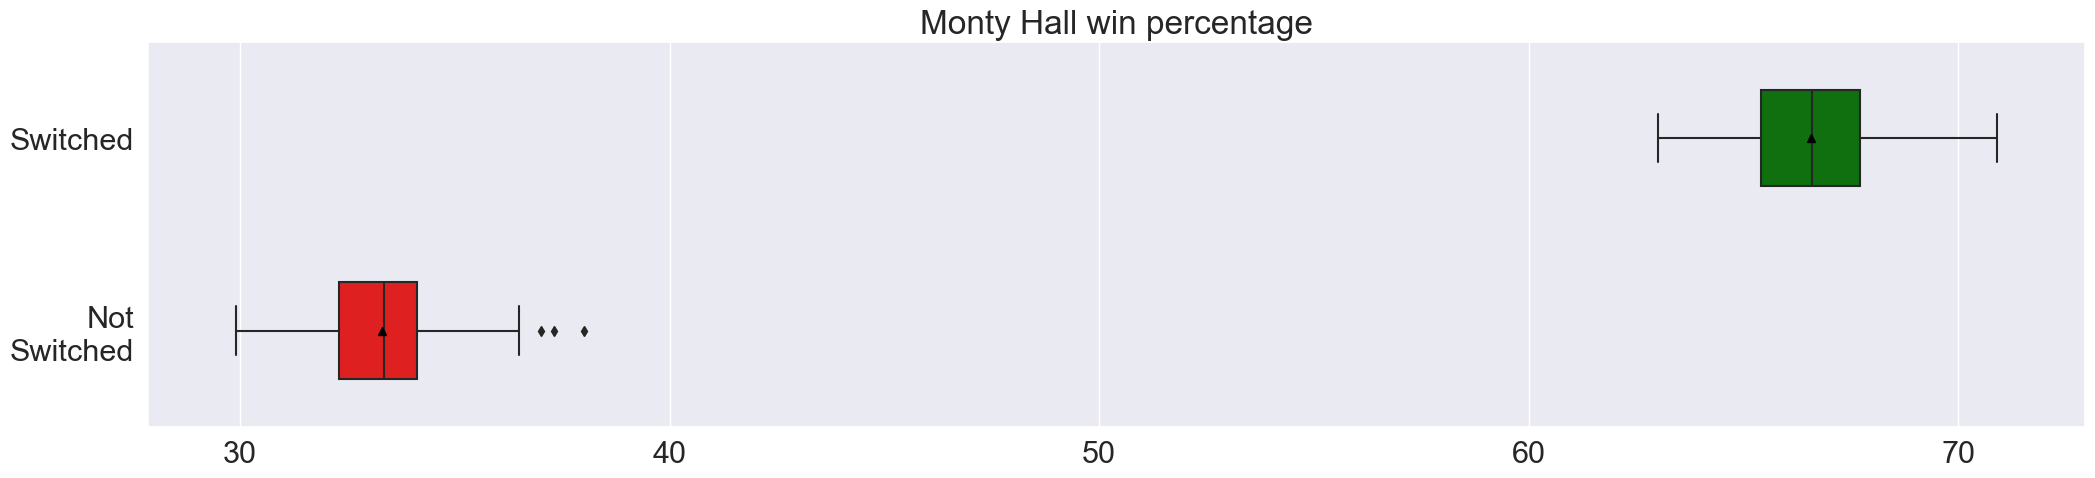

In [2]:

    
def main():
   
    #obtain user settings for # tests in an experiment and number of repetitions of experiment
    tests = int(input("How many simulations? Numerical values only: "))
    reps = int(input(f"How many samples of {tests} simulations would you like to collect?: "))
    
    #repeat the mhallsim experiment the specified number of times (reps)
    #Use user selected number of tests to determine sample size of each repetition
    
    for _ in range(reps):
        wins_over_tests_sw = float(mhallsim(tests, True))
        percentw_sw = wins_over_tests_sw*100
        rep_results_switch.append(percentw_sw)
    
    for _ in range(reps):
        wins_over_tests_ns = float(mhallsim(tests, False))
        percentw_ns = wins_over_tests_ns*100
        rep_results_no_switch.append(percentw_ns)
    
    #grid for plot
    sns.set(style='darkgrid', font_scale=2)

    #figure size and color palette
    fig, ax = plt.subplots(figsize=(25,5))
    palette = ['Green', 'Red', 'Black']
    sns.set_palette(sns.color_palette(palette))
    
    #plot on a boxplot the distribution of win percentage for each case (switch of no switch)
    sns.boxplot(data = [rep_results_switch, rep_results_no_switch], orient = 'h', width = .5, showmeans = True).set(title= "Monty Hall win percentage")
    yvalues = ['Switched', 'Not\nSwitched']
    plt.yticks(np.arange(2), yvalues)
    plt.xlabel = "Win Percentage"
    plt.show


def mhallsim(num_simulations, switch_doors):
    #start null count for total number of wins. program will iterate count up for each win
    num_wins = 0

    for _ in range(num_simulations):
        # Randomly select door with the prize
        prize_door = random.randint(1, 3)

        # Randomly select the door chosen by the player. Can be prize door.
        player_choice = random.randint(1, 3)

        #Randomly Determine the door to be opened by the host, but ALWAYS keep prize door closed.
        #Achieved by removing player choice and prize door (may sometimes be same) from possible 
        #doors to open, then randomly select opened door from remaining choices
        
        doors = [1, 2, 3]
        doors.remove(prize_door)
        
        if player_choice != prize_door:
            doors.remove(player_choice)

        host_opened = random.choice(doors)

        # Switch doors based on user pref.
        if switch_doors:
            doors = [1, 2, 3]
            doors.remove(player_choice)
            doors.remove(host_opened)
            player_choice = doors[0]

        # Check if player wins
        if player_choice == prize_door:
            num_wins += 1

    return num_wins / num_simulations




main()

Calculate means, std. deviation for both methods

In [3]:
#Calculate and return means for both arrays 
switch_df= pd.DataFrame(data = rep_results_switch)
sw_mean = round(int(switch_df.mean()), 3)
sw_std = round(int(switch_df.std()), 3)
sw_cint = stat.t.interval(confidence=0.95, df=len(switch_df)-1, loc=sw_mean, scale=stat.sem(switch_df))

no_switch_df= pd.DataFrame(data = rep_results_no_switch)
ns_mean = round(int(no_switch_df.mean()), 3)
ns_std = round(int(no_switch_df.std()), 3)
#ns_cint = stat.t.interval(confidence=0.95, df=len(no_switch_df)-1, loc=ns_mean, scale=stat.sem(no_switch_df))

print(f'The chance of winning when you switch is {sw_mean}, with a standard deviation of {sw_std}.')
print(f'With a confidence of 90%, your chance of winning when you switch falls inside the following range:')
print(stat.t.interval(confidence=0.90, df=len(rep_results_switch)-1, loc=np.mean(rep_results_switch), scale=stat.sem(rep_results_switch)))
print('')
print(f'However, if you do NOT switch, the mean chance of winning is {ns_mean}, with a standard deviation of {ns_std}.')
print(f'With a confidence of 90%, your chance of winning when you DO NOT switch falls inside the following range:')
print(stat.t.interval(confidence=0.90, df=len(rep_results_no_switch)-1, loc=np.mean(rep_results_no_switch), scale=stat.sem(rep_results_no_switch)))


The chance of winning when you switch is 66, with a standard deviation of 1.
With a confidence of 90%, your chance of winning when you switch falls inside the following range:
(66.39032119808076, 66.75367880191925)

However, if you do NOT switch, the mean chance of winning is 33, with a standard deviation of 1.
With a confidence of 90%, your chance of winning when you DO NOT switch falls inside the following range:
(33.14274175382077, 33.49425824617923)


The box plots above show a distinct difference in win percentage distributions between switching and not switching the chosen door. According to the box plots, switching provides a statistically significant improvement to your chance of winning. 
The calculated means, standard deviations, and 95% confidence intervals for both approaches further highlights this. 




<function matplotlib.pyplot.show(close=None, block=None)>

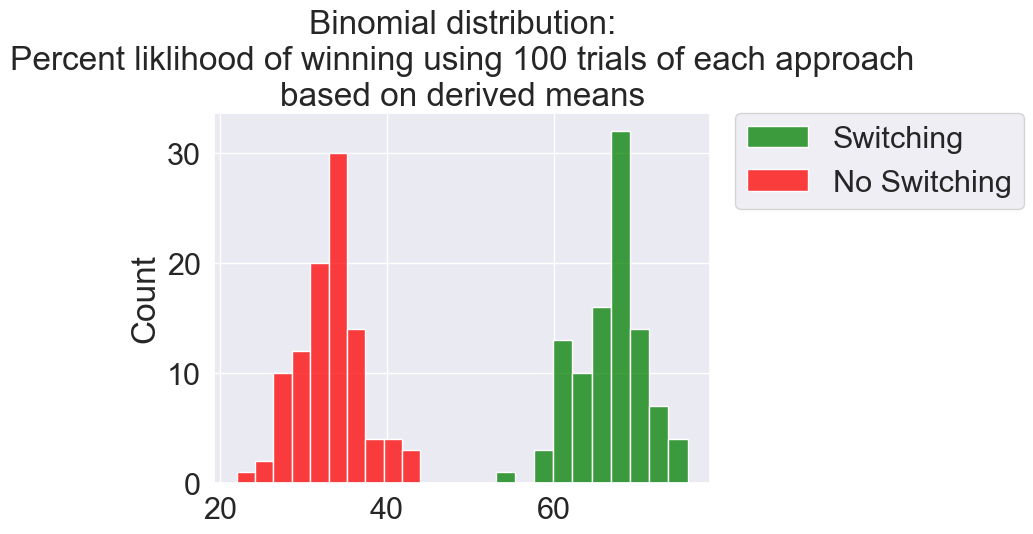

In [4]:
sw_sample = nprand.binomial(n = 100, p = sw_mean/100, size = 100)
sns.histplot(sw_sample, kde = False, color='green', bins = 10)
ns_sample = nprand.binomial(n = 100, p = ns_mean/100, size = 100)
sns.histplot(ns_sample, kde = False, color = 'red', bins = 10)

plt.title('Binomial distribution:\nPercent liklihood of winning using 100 trials of each approach\nbased on derived means')
plt.legend(labels=["Switching","No Switching"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show

This chart shows a binomial distribution for both approaches, using the means derived above. This is just a visual representation of the derived mean.